# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

Automated facial expression recognition provides an objective assessment of emotions. Human based assessment of emotions has many limitations and biases and automated facial expression technology has been found to deliver a better level of insight into behavior patterns. Emotion detection from facial expressions using AI is useful in automatically measuring consumers’ engagement with their content and brands, audience engagement for advertisements, customer satisfaction in the retail sector, psychological analyses, law enforcement etc.

**Objectives:** 

**Stage 4 (15 Marks):** Train a CNN Model and perform Expression Recognition in the EFR Mobile App.

**Stage 5 (5 Marks):** Test for Anti-Face Spoofing on the EFR Mobile App.

##**Stage 4 (15 Marks)**

**(i) Train a CNN Model for Expression Recognition on given Expression data  
(ii) Deploy the Model and Perform Expression Recognition on Team Data through the EFR Mobile App**


---


* Define and train a CNN for expression recognition for the data under folder "Expression_data" which segregated on expression basis.
* Collect your team data using EFR application and test your model on the same and optimize the CNN architecture for predicting the respective labels of the images.
* Save and Download the trained expression model and upload them in the ftp server (refer to [Filezilla Installation and Configuration document](https://drive.google.com/file/d/1hnMXcwpCwAz94ljAhtsJdQSfe-JaOD5K/view?usp=sharing)).

* Update the **“exp_recognition.py”** file in the server. Open the files in the terminal (Command prompt) and provide the code for predicting the expression on the face (Note: To define the architecture of your trained model, you'll need to define it in the file **"exp_recognition_model.py"**). 

* Test your model on the mobile app for Expression Recognition and Sequence Expression. Your team can also see your results in your terminal.


* Grading Scheme:
> * Expression Recognition (12M): If the functionality is returning expression class correctly for the face using the mobile app’s “Expression Recognition” functionality
> * Sequence Expression (3M): Get three consecutive correct Expressions using the mobile app’s “Sequence Expressions” functionality

**Download the dataset**

In [ ]:
! wget wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Expression_data.zip
! unzip Expression_data.zip

**Dataset attributes:**

During the setup you have downloaded the Expression data:

* **Expression_data**: In this folder, the images are segregrated in terms of Expression
> * Expressions available: ANGER, DISGUST, FEAR, HAPPINESS, NEUTRAL, SADNESS, SURPRISE
> * Each class is organised as one folder
> * There are ~18000 total images in the training data and ~4500 total images in the testing data

In [ ]:
%ls

captured_images_with_Expression/  Expression_data.zip  sample_data/
Expression_data/                  __MACOSX/


**Team Data Collection (activate the server first)** 

  - (This can be done on the day of the Hackathon once the login username and password are given)

Activate the Server Access
* Open the terminal (Command Prompt)
* Login to SSH by typing **ssh (username)@aiml-sandbox1.talentsprint.com**. Give the login username which is given to you. 

Eg: `ssh b17h3gxx@aiml-sandbox1.talentsprint.com`

  (If it is your first time connecting to the server from this computer, accept the connection by typing "yes".)
* After logging into SSH, please activate your virtual environment using the
command **source venv/bin/activate** and then press enter
* You can start the server by giving the command **sh runserver.sh** and then press enter.
* In order to collect team data in mobile app, ensure the server is active


**Collect your team data using the EFR Mobile App and fine-tune the CNN for expression data on your team**

Team Data Collection

* Follow the "Mobile_APP_Documentation" to collect the Expression photos of your team. These will be stored in the server to which login is provided to you.

[Mobile_APP_Documentation](https://drive.google.com/file/d/1tpr8_U0Ll_TexN4s-0pmPPg23J7Usok2/view?usp=sharing)


**Download your team expression data from the EFR app into your colab notebook using the links provided below**

NOTE: Replace the string "username" with your login username (such as b17h3gxx) in the below cell for expression images. 

This data will be useful for testing the above trained cnn networks.

In [ ]:
!wget -qq -nH --recursive --no-parent --reject 'index.*' https://aiml-sandbox.talentsprint.com/expression_detection/b16h3test01/captured_images_with_Expression/ --cut-dirs=3  -P ./captured_images_with_Expression

In [ ]:
%ls

**Imports: All the imports are defined here**

We are installing the following specific package versions -> torch 1.0.1, torchvision 0.2.1 and PIL 5.3.0 to maintain compatibility with the server 

* Firstly uninstall and downgrade the current PIL version. In the next cell, you will see a button "Restart Runtime" button appear below. 
* Click on it and select 'Yes' to restart runtime and reset the PIL package. 
* **DO NOT** go to the notebook's **RUNTIME  -> RESTART RUNTIME**. This will restart all packages and you will need to repeat all the steps from beginning.


* Simply continue with the next code cell

PIL (Pillow) is the Python Image Library. Used to cut and resize images, or do simple manipulation.


In [ ]:
!pip uninstall -y Pillow

Found existing installation: Pillow 7.1.2
Uninstalling Pillow-7.1.2:
  Successfully uninstalled Pillow-7.1.2


In [ ]:
# IGNORE ERROR. Click on Restart Runtime button and slect 'Yes' if prompts. Then proceed with the next code cell.
!pip install Pillow==5.3.0

     |████████████████████████████████| 2.0 MB 10.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 5.3.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# When you run this, it should give you pil version = 5.3.0
import PIL
print(PIL.__version__)

5.3.0


In [ ]:
%matplotlib inline
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torchvision.utils
import numpy as np
import random
from PIL import Image
import torch
from torch.autograd import Variable
import PIL.ImageOps    
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import os
import warnings
from time import sleep
import sys
warnings.filterwarnings('ignore')

In [ ]:
import shutil

def moveTeamFilesToExpData(TeamDir, ExpTrainDir):
    for (Team_root, Team_dirs, Team_files), (Exp_root, Exp_dirs, Exp_files) in zip(os.walk(TeamDir), os.walk(ExpTrainDir)):
        for (Team_name, Exp_name) in zip(Team_files, Exp_files):
            if Team_name.endswith('.jpg'):
                Team_path = os.path.join(Team_root, Team_name)
                if os.path.exists(Team_path) and (os.path.basename(Team_root) == os.path.basename(Exp_root)):
                    shutil.move(Team_path, Exp_root)

moveTeamFilesToExpData("captured_images_with_Expression","Expression_data/Facial_expression_train")

For the following step, to obtain hints on building a CNN model for face expression, you may refer to this [article](https://drive.google.com/open?id=1P2rpaWW3tOtGGnw4dvtdZ4hjoc8iDNst)

**Define and train a CNN model for expression recognition**

In [ ]:
# Sample Helper function
def rgb2gray(image):
    return image.convert('L')

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
# YOUR CODE HERE to define and train CNN model for Expression_Data.

batch_size = 100

trnscm = transforms.Compose([rgb2gray, transforms.Resize((48,48)), transforms.ToTensor()])

trainset = dset.ImageFolder(root='/content/Expression_data/Facial_expression_train/',transform = trnscm)
validset = dset.ImageFolder(root='/content/Expression_data/Facial_expression_test/', transform = trnscm)

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        print(images[0].shape)
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break

torch.Size([1, 48, 48])


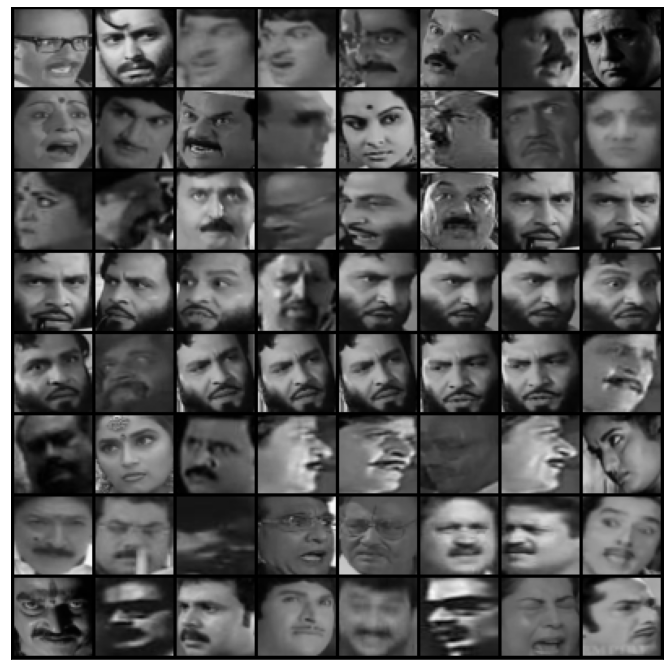

In [ ]:
train_loader = DataLoader(trainset, batch_size=batch_size)
valid_loader = DataLoader(validset, batch_size=batch_size)

show_batch(train_loader)

In [ ]:
# Check number of training and Validation images
dataset_sizes = {'1 Train': len(trainset), '2 Validation': len(validset)}
dataset_sizes

{'1 Train': 18588, '2 Validation': 4548}

In [ ]:
# Generate a batch of 10 images and labels
train_images, train_labels = next(iter(train_loader))
train_images.shape, train_labels.shape

(torch.Size([100, 1, 48, 48]), torch.Size([100]))

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class Flatten(nn.Module):
    def forward(self, input):
        flattened = input.view(input.size(0), -1)
        return flattened

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.conv1 = conv_block(1, 128)
        self.conv2 = conv_block(128, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        self.drop1 = nn.Dropout(0.5)
        
        self.conv3 = conv_block(128, 256)
        self.conv4 = conv_block(256, 256, pool=True)
        self.res2 = nn.Sequential(conv_block(256, 256), conv_block(256, 256))
        self.drop2 = nn.Dropout(0.5)
        
        self.conv5 = conv_block(256, 512)
        self.conv6 = conv_block(512, 512, pool=True)
        self.res3 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        self.drop3 = nn.Dropout(0.5)
        
        self.classifier = nn.Sequential(nn.MaxPool2d(6), 
                                        Flatten(),
                                        nn.Linear(512, 7))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.drop1(out)
        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.drop2(out)
        
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.res3(out) + out
        out = self.drop3(out)
        
        out = self.classifier(out)
        return out

In [ ]:
net = CNNModel()
net = net.to(device)
#net

In [ ]:
# Print the summary of the model
from torchsummary import summary
summary(net, input_size=(1, 48,48))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 48, 48]           1,280
       BatchNorm2d-2          [-1, 128, 48, 48]             256
              ReLU-3          [-1, 128, 48, 48]               0
            Conv2d-4          [-1, 128, 48, 48]         147,584
       BatchNorm2d-5          [-1, 128, 48, 48]             256
              ReLU-6          [-1, 128, 48, 48]               0
         MaxPool2d-7          [-1, 128, 24, 24]               0
            Conv2d-8          [-1, 128, 24, 24]         147,584
       BatchNorm2d-9          [-1, 128, 24, 24]             256
             ReLU-10          [-1, 128, 24, 24]               0
           Conv2d-11          [-1, 128, 24, 24]         147,584
      BatchNorm2d-12          [-1, 128, 24, 24]             256
             ReLU-13          [-1, 128, 24, 24]               0
          Dropout-14          [-1, 128,

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

**Test your model and optimize CNN architecture for predicting the labels correctly**

In [ ]:
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def train_validation(epochs, model):
    torch.cuda.empty_cache()

    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            target = model(images)
            loss = criterion(target,labels)
            loss.backward()
            optimizer.step()
            train_loss = loss.item() * images.size(0)
        
        # Validation Phase
        valid_loss = 0.0
        model.eval()     # Optional when not using Model Specific layer
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            target = model(images)
            loss = criterion(target,labels)
            valid_loss = loss.item() * images.size(0)

        print(f'Epoch {epoch+1} \t\t Training Loss: {train_loss / len(train_loader)} \t\t Validation Loss: {valid_loss / len(valid_loader)}')
    
    return model

In [ ]:
trained_model = train_validation(10, net)

Epoch 1 		 Training Loss: 1.1541674624207199 		 Validation Loss: 2.4678809746452
Epoch 2 		 Training Loss: 0.5262349292796146 		 Validation Loss: 2.366575925246529
Epoch 3 		 Training Loss: 0.1800959622988137 		 Validation Loss: 1.2488066631814707
Epoch 4 		 Training Loss: 0.0003031043496022942 		 Validation Loss: 0.009496398756037588
Epoch 5 		 Training Loss: 0.4578347565025412 		 Validation Loss: 2.4593107596687647
Epoch 6 		 Training Loss: 0.07837551639926049 		 Validation Loss: 1.423408031463623
Epoch 7 		 Training Loss: 0.01197577299930716 		 Validation Loss: 0.9644949125206989
Epoch 8 		 Training Loss: 0.7503159430719191 		 Validation Loss: 3.3963809842648716
Epoch 9 		 Training Loss: 0.0020862189872610953 		 Validation Loss: 0.18103350504584934
Epoch 10 		 Training Loss: 0.16728321454858266 		 Validation Loss: 1.993739190308944


**Save your trained model**

* Save the state dictionary of the classifier (use pytorch only), It will be useful in
integrating model to the mobile app

 [Hint](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

In [ ]:
### YOUR CODE HERE for saving the CNN model
state = {'net_dict': trained_model.state_dict()}
torch.save(state, './expression_model.t7')

**Download your trained model**
* Given the path of model file the following code downloads it through the browser

In [ ]:
from google.colab import files
files.download('expression_model.t7')

##**Stage 5 (Anti Face Spoofing): (5 marks)**


---



The objective of anti face spoofing is to be able to unlock (say) a screen not just by your image
(which can be easily be spoofed with a photograph of yours) but by a switch in the expression
demanded by the Mobile App (which is much less probable to mimic)
* **Grading scheme**:
> * **Anti Face Spoofing**: (5M Only if both the cases mentioned below are achieved)
>>* **Unlock**: Correct face + Correct Demanded Expression
>>* **Stay Locked**: Correct face + Incorrect Demanded Expression (as you might imagine there are multiple other such possibilities, which you are free to explore)

In [ ]:
# Test in your mobile app and see if it gets unlock.